In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
#masterdataK = pd.read_csv("../experiments/2019-04-04-21-43_BanditScalabilityK_/BanditScalabilityK.csv")
masterdataK = pd.read_csv("../experiments/2019-03-26-20-37_BanditScalabilityK_/BanditScalabilityK.csv")

In [3]:
masterdataT = pd.read_csv("../experiments/2019-03-26-22-17_BanditScalabilityT_/BanditScalabilityT.csv")

In [4]:
masterdataK.head()

,bandit,dataset,npairs,nbatches,scalingstrategy,k,gain,cputime,iteration
0,Exp3.M,pb_1wx10_1000,10,1000,KL-1-10-0.3,10.0,0.0,29.5290,0
1,Exp3.M,pb_1wx10_1000,10,1000,KL-1-10-0.4,10.0,0.0,23.1548,0
2,Exp3.M,pb_1wx10_1000,10,1000,KL-1-10-0.3,10.0,0.0,5.8461,1
3,Exp3.M,pb_1wx10_1000,10,1000,KL-1-10-0.4,10.0,0.0,2.9288,1
4,Exp3.M,pb_1wx10_1000,10,1000,KL-1-10-0.4,9.0,0.0,3.5799,2


In [5]:
masterdataK.bandit.unique()

array(['Exp3.M', 'OR', 'CUCBm', 'MP-TS', 'IMP-TS', 'CUCB', 'MP-KLUCB',
       'MP-KLUCBPLUS', 'MP-OTS', 'MP-TS-ADWIN-0.1'], dtype=object)

In [6]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [7]:
plotkind = "small"

shortshortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'Exp3.M', 
             'CUCB', 
             'OR']

prettynames = {
    "CUCB": "S-CUCB",
    "CUCB-ADWIN-0.1": "S-CUCB-ADWIN",
    "Exp3.M": "S-Exp3.M",
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCB-ADWIN-0.1': "S-KL-UCB-ADWIN",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    'OD-ADWIN-0.1': "S-OD-ADWIN",
    'OS-ADWIN-0.1': "S-Oracle-ADWIN",
    'OR-ADWIN-0.1': "S-OR-ADWIN",
    "OR": "S-OR",
    "OS": "S-Oracle",
    'MP-DTS; g=0.9': "S-dTS",
    'MP-EG; e=0.9': "S-EG",
    'MP-SWUCB; w=1000': "S-SW-UCB"
}

styledictionary = {
    'MP-DTS; g=0.9': {'marker': 'o', 'color': blues5[2], 'linestyle': "-"},
    'MP-EG; e=0.9': {'marker': 'o', 'color': purples5[2], 'linestyle': "-"},
    'MP-SWUCB; w=1000': {'marker': 'o', 'color': greens5[3], 'linestyle': "-"},
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OD-ADWIN-0.1': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OS-ADWIN-0.1': {'marker': '', 'color': 'black', 'linestyle': "-"},
    'OR-ADWIN-0.1': {'marker': '', 'color': 'black', 'linestyle': "-"}
}

In [8]:
masterdataK["dataset"].unique()

array(['pb_1wx10_1000', 'pb_1wx20_1000', 'pb_1wx50_1000', 'pb_1wx100_1000',
       'pb_1wx200_1000', 'pb_1wx350_1000', 'pb_1wx500_1000',
       'pb_1wx750_1000', 'pb_1wx1000_1000', 'pb_1wx1250_1000',
       'pb_1wx1500_1000', 'pb_1wx1750_1000', 'pb_1wx2000_1000'], dtype=object)

In [9]:
masterdataK["bandit"].unique()

array(['Exp3.M', 'OR', 'CUCBm', 'MP-TS', 'IMP-TS', 'CUCB', 'MP-KLUCB',
       'MP-KLUCBPLUS', 'MP-OTS', 'MP-TS-ADWIN-0.1'], dtype=object)

In [10]:
masterdataK["scalingstrategy"].unique()

array(['KL-1-10-0.3', 'KL-1-10-0.4', 'No-2', 'KL-1-10-0.5', 'KL-1-10-0.9',
       'KL-1-10-0.7', 'KL-1-10-0.1', 'KL-1-10-0.2', 'No-1', 'No-5',
       'KL-1-10-0.8', 'No-3', 'KL-1-10-0.6', 'KL-1-20-0.9', 'No-4',
       'KL-1-20-0.1', 'KL-1-20-0.8', 'KL-1-20-0.3', 'No-10', 'KL-1-20-0.4',
       'KL-1-20-0.2', 'KL-1-20-0.6', 'No-6', 'KL-1-20-0.5', 'KL-1-20-0.7',
       'No-12', 'KL-1-50-0.2', 'KL-1-50-0.8', 'KL-1-50-0.6', 'No-16',
       'KL-1-50-0.7', 'KL-1-50-0.9', 'KL-1-50-0.3', 'KL-1-50-0.4', 'No-25',
       'KL-1-50-0.1', 'KL-1-50-0.5', 'KL-1-100-0.3', 'KL-1-100-0.1',
       'KL-1-100-0.4', 'No-20', 'KL-1-100-0.8', 'KL-1-100-0.7', 'No-33',
       'KL-1-100-0.6', 'KL-1-100-0.5', 'No-50', 'KL-1-100-0.9',
       'KL-1-100-0.2', 'KL-1-200-0.8', 'KL-1-200-0.9', 'KL-1-200-0.5',
       'KL-1-200-0.3', 'KL-1-200-0.7', 'KL-1-200-0.2', 'No-100',
       'KL-1-200-0.1', 'No-66', 'KL-1-200-0.4', 'No-40', 'KL-1-200-0.6',
       'KL-1-350-0.4', 'KL-1-350-0.5', 'No-70', 'KL-1-350-0.3',
       'KL-1-

In [11]:
masterdataT["scalingstrategy"].unique()

array(['No-25', 'KL-1-100-0.7', 'KL-1-100-0.6', 'KL-1-100-0.9',
       'KL-1-100-0.1', 'KL-1-100-0.5', 'No-10', 'KL-1-100-0.3',
       'KL-1-100-0.2', 'KL-1-100-0.4', 'No-33', 'No-50', 'KL-1-100-0.8',
       'No-20'], dtype=object)

<IPython.core.display.Javascript object>


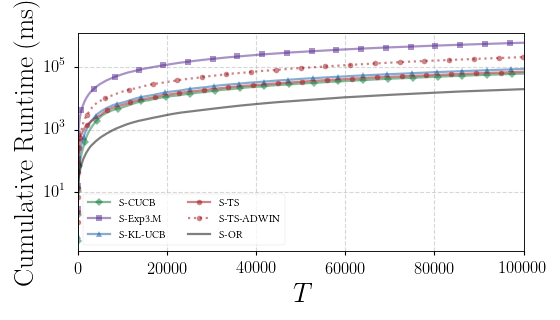

In [12]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(7,4), sharex=True, sharey='row')

subdata = masterdataT[['KL-1-100-0.7' in x for x in masterdataT["scalingstrategy"]]]
subdata = subdata[subdata["bandit"].isin(shortshortlist)]
data_grouped = subdata.groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label=prettynames[name],linewidth=lw, logy=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    plt.ylabel("$\mathrm{Cumulative~Runtime~(ms)}$")
    plt.xlabel("$T$")
    
    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)
    
    plt.legend(fontsize=10, ncol=2)
    
plt.tight_layout()

In [12]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(7,5), sharex=True, sharey='row')

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[["No" in x for x in subdata["scalingstrategy"]]]
subdata = subdata[subdata["bandit"].isin(["MP-TS"])]
subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
data_grouped = subdata.groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label="MP-TS",linewidth=lw, logy=True,
                        markevery=0.05, alpha=0.5, markersize=5,linestyle="--",
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[subdata["bandit"].isin(shortshortlist)]
subdata = subdata[['KL' in x for x in subdata["scalingstrategy"]]]

subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
data_grouped = subdata.groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label=prettynames[name],linewidth=lw, logy=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime (ms)}$")
    plt.ylabel("$\mathrm{Cumulative~Runtime~(ms)}$")
    
    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)
    
    plt.legend(fontsize=10, ncol=2)
    
plt.xlabel("$T$")
plt.tight_layout()

<IPython.core.display.Javascript object>

KeyError: 'bandit'

In [14]:
masterdataK["dataset"].unique()

array(['bioliq_1wx10_1000', 'bioliq_1wx20_1000', 'bioliq_1wx50_1000', 'bioliq_1wx100_1000',
       'bioliq_1wx200_1000', 'bioliq_1wx350_1000', 'bioliq_1wx500_1000',
       'bioliq_1wx750_1000', 'bioliq_1wx1000_1000', 'bioliq_1wx1250_1000',
       'bioliq_1wx1500_1000', 'bioliq_1wx1750_1000', 'bioliq_1wx2000_1000'], dtype=object)

In [15]:
narms = {
    "bioliq_1wx10_1000": 10,
    "bioliq_1wx20_1000": 20,
    "bioliq_1wx50_1000": 50,
    "bioliq_1wx100_1000": 100,
    "bioliq_1wx200_1000": 200,
    "bioliq_1wx300_1000": 300,
    "bioliq_1wx350_1000": 350,
    "bioliq_1wx500_1000": 500,
    "bioliq_1wx750_1000": 750,
    "bioliq_1wx1000_1000": 1000,
    "bioliq_1wx1250_1000": 1250,
    "bioliq_1wx1500_1000": 1500,
    "bioliq_1wx1750_1000": 1750,
    "bioliq_1wx2000_1000": 2000,
    
    "bioliq_1wx10_10000": 10,
    "bioliq_1wx20_10000": 20,
    "bioliq_1wx50_10000": 50,
    "bioliq_1wx100_10000": 100,
    "bioliq_1wx200_10000": 200,
    "bioliq_1wx300_10000": 300,
    "bioliq_1wx350_10000": 350,
    "bioliq_1wx500_10000": 500,
    "bioliq_1wx750_10000": 750,
    "bioliq_1wx1000_10000": 1000,
    "bioliq_1wx1250_10000": 1250,
    "bioliq_1wx1500_10000": 1500,
    "bioliq_1wx1750_10000": 1750,
    "bioliq_1wx2000_10000": 2000,
    
    "bioliq_1wx190": 190,
    "bioliq_1wx500": 500,
    "bioliq_1wx1000": 1000,
    "bioliq_1wx2000": 2000,
    "bioliq_1wx5000": 5000
}

In [16]:
masterdataK["scalingstrategy"].unique()

array(['KL-1-10-0.3', 'KL-1-10-0.4', 'No-2', 'KL-1-10-0.5', 'KL-1-10-0.9',
       'KL-1-10-0.7', 'KL-1-10-0.1', 'KL-1-10-0.2', 'No-1', 'No-5',
       'KL-1-10-0.8', 'No-3', 'KL-1-10-0.6', 'KL-1-20-0.9', 'No-4',
       'KL-1-20-0.1', 'KL-1-20-0.8', 'KL-1-20-0.3', 'No-10', 'KL-1-20-0.4',
       'KL-1-20-0.2', 'KL-1-20-0.6', 'No-6', 'KL-1-20-0.5', 'KL-1-20-0.7',
       'No-12', 'KL-1-50-0.2', 'KL-1-50-0.8', 'KL-1-50-0.6', 'No-16',
       'KL-1-50-0.7', 'KL-1-50-0.9', 'KL-1-50-0.3', 'KL-1-50-0.4', 'No-25',
       'KL-1-50-0.1', 'KL-1-50-0.5', 'KL-1-100-0.3', 'KL-1-100-0.1',
       'KL-1-100-0.4', 'No-20', 'KL-1-100-0.8', 'KL-1-100-0.7', 'No-33',
       'KL-1-100-0.6', 'KL-1-100-0.5', 'No-50', 'KL-1-100-0.9',
       'KL-1-100-0.2', 'KL-1-200-0.8', 'KL-1-200-0.9', 'KL-1-200-0.5',
       'KL-1-200-0.3', 'KL-1-200-0.7', 'KL-1-200-0.2', 'No-100',
       'KL-1-200-0.1', 'No-66', 'KL-1-200-0.4', 'No-40', 'KL-1-200-0.6',
       'KL-1-350-0.4', 'KL-1-350-0.5', 'No-70', 'KL-1-350-0.3',
       'KL-1-

<IPython.core.display.Javascript object>


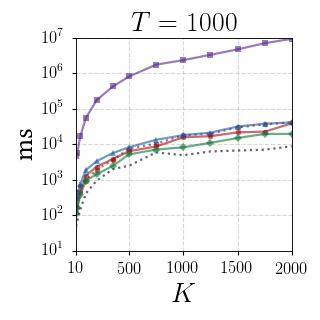

In [19]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(4,4), sharex=True, sharey='row')

subdata = masterdataK[["No" in x for x in masterdataK["scalingstrategy"]]]
means = subdata[subdata["bandit"].isin(["OR"])].groupby(["bandit", "dataset"]).sum()
means = means.reset_index().replace({"dataset": narms})

for alg in means.bandit.unique():
    plt.sca(axarr)
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    d.plot("dataset", "cputime", label="RO", ax=axarr, logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=":",
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])
    

shortshortlist = ["MP-TS", 'MP-TS-ADWIN-0.1', "CUCB", "MP-KLUCB", "Exp3.M"]
subdata = masterdataK[["KL" in x for x in masterdataK["scalingstrategy"]]]

means = subdata[subdata["bandit"].isin(shortshortlist)].groupby(["bandit", "dataset"]).sum()
means = means.reset_index().replace({"dataset": narms})

for alg in shortshortlist:
    plt.sca(axarr)
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    d.plot("dataset", "cputime", label=prettynames[alg], ax=axarr, logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=styledictionary[alg]['linestyle'],
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])

plt.ylabel("ms")
plt.xlabel("$K$")
plt.title("$T=1000$")

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

plt.ylim((10, 10000000))
plt.yticks([10,100,1000,10000,100000,1000000,10000000])

plt.xticks([10,500,1000,1500,2000])

ax = plt.gca()
ax.legend_ = None

plt.tight_layout()
plt.savefig("scalability_K.pdf")

<IPython.core.display.Javascript object>


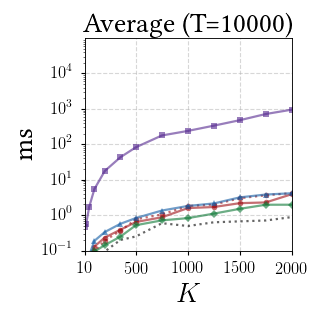

In [20]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(4,4), sharex=True, sharey='row')

subdata = masterdataK[["No" in x for x in masterdataK["scalingstrategy"]]]
means = subdata[subdata["bandit"].isin(["OR"])].groupby(["bandit", "dataset"]).sum()/10000
means = means.reset_index().replace({"dataset": narms})

for alg in means.bandit.unique():
    plt.sca(axarr)
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    d.plot("dataset", "cputime", label="RO", ax=axarr, logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=":",
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])
    

shortshortlist = ["MP-TS", 'MP-TS-ADWIN-0.1', "CUCB", "MP-KLUCB", "Exp3.M"]
subdata = masterdataK[["KL" in x for x in masterdataK["scalingstrategy"]]]

means = subdata[subdata["bandit"].isin(shortshortlist)].groupby(["bandit", "dataset"]).sum()/10000
means = means.reset_index().replace({"dataset": narms})

for alg in shortshortlist:
    plt.sca(axarr)
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    d.plot("dataset", "cputime", label=prettynames[alg], ax=axarr, logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=styledictionary[alg]['linestyle'],
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])

plt.ylabel("ms")
plt.xlabel("$K$")
plt.title("Average (T=10000)")

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

plt.ylim((0.1, 100000))
plt.yticks([0.1, 1, 10,100,1000,10000])

plt.xticks([10,500,1000,1500,2000])

ax = plt.gca()
ax.legend_ = None

plt.tight_layout()
#plt.savefig("scalability_K.pdf")

<IPython.core.display.Javascript object>


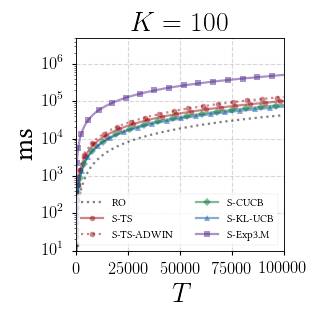

In [21]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(4,4), sharex=True, sharey='row')

nvar = 20

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[["No" in x for x in subdata["scalingstrategy"]]]
subdata = subdata[subdata["bandit"].isin(["OR"])]
subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
data_grouped = subdata.groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label="RO",linewidth=lw, logy=True,
                        markevery=0.05, alpha=0.5, markersize=5,linestyle=":",
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[subdata["bandit"].isin(shortshortlist)]
subdata = subdata[['KL' in x for x in subdata["scalingstrategy"]]]
subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
custom_order = ["MP-TS", 'MP-TS-ADWIN-0.1', "CUCB", "MP-KLUCB", "Exp3.M"]
for bandit in custom_order:
    df = subdata[subdata["bandit"] == bandit]
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    if(name == "OR"):
        pass
    else:                                   
        cumsum.plot(label=prettynames[name],linewidth=lw, logy=True,
                    linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)
    
    plt.legend(fontsize=10, ncol=2, loc="lower right")
    
plt.title("$K=100$")
plt.xlabel("$T$")
plt.ylabel("ms")
plt.ylim((10, 5000000))
plt.yticks([10,100,1000,10000,100000,1000000])

plt.tight_layout()

plt.savefig("scalability_T.pdf")

<IPython.core.display.Javascript object>


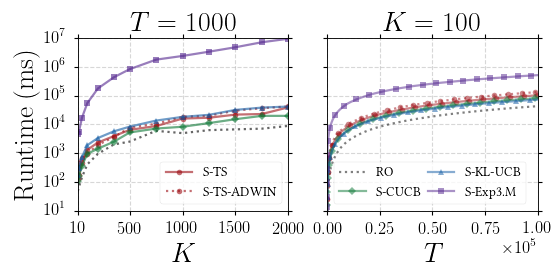

In [23]:
f, axarr = plt.subplots(1,2, figsize=(7,3.5), sharey=True)

################

plt.sca(axarr[0])

subdata = masterdataK[["No" in x for x in masterdataK["scalingstrategy"]]]
means = subdata[subdata["bandit"].isin(["OR"])].groupby(["bandit", "dataset"]).sum()
means = means.reset_index().replace({"dataset": narms})

for alg in means.bandit.unique():
    plt.sca(axarr[0])
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    d.plot("dataset", "cputime", label="_nolegend_", ax=axarr[0], logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=":",
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])

shortshortlist = ["MP-TS", 'MP-TS-ADWIN-0.1', "CUCB", "MP-KLUCB", "Exp3.M"]
subdata = masterdataK[["KL" in x for x in masterdataK["scalingstrategy"]]]

means = subdata[subdata["bandit"].isin(shortshortlist)].groupby(["bandit", "dataset"]).sum()
means = means.reset_index().replace({"dataset": narms})

for alg in shortshortlist:
    plt.sca(axarr[0])
    d = means[means["bandit"] == alg]
    d = d.sort_values("dataset")
    if("TS" in alg):
        label = prettynames[alg]
    else:
        label = '_nolegend_'
    d.plot("dataset", "cputime", label=label, ax=axarr[0], logy=True, alpha=0.6, linewidth=2,markersize=5,
           linestyle=styledictionary[alg]['linestyle'],
          marker= styledictionary[alg]['marker'], c=styledictionary[alg]['color'])


plt.legend(fontsize=12, ncol=1, loc="lower right")   

plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.xlabel("$K$")
plt.title("$T=1000$")

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

plt.ylim((10, 50000000))
plt.yticks([10,100,1000,10000,100000,1000000,10000000])

plt.xticks([10,500,1000,1500,2000])
plt.tick_params(top=True, right=True)


################

plt.sca(axarr[1])

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[["No" in x for x in subdata["scalingstrategy"]]]
subdata = subdata[subdata["bandit"].isin(["OR"])]
subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
data_grouped = subdata.groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label="RO",linewidth=lw, logy=True,
                        markevery=0.05, alpha=0.5, markersize=5,linestyle=":",
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

subdata = masterdataT[masterdataT["dataset"] == 'bioliq_1wx100_100000']
subdata = subdata[subdata["bandit"].isin(shortshortlist)]
subdata = subdata[['KL' in x for x in subdata["scalingstrategy"]]]
subdata = subdata.groupby(["bandit", "iteration"]).mean().reset_index()
custom_order = ["MP-TS", 'MP-TS-ADWIN-0.1', "CUCB", "MP-KLUCB", "Exp3.M"]
for bandit in custom_order:
    df = subdata[subdata["bandit"] == bandit]
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    if(name == "OR"):
        pass
    else:                 
        if("TS" in name):
            label = '_nolegend_' 
        else:
            label = prettynames[name]
        
        cumsum.plot(label=label,linewidth=lw, logy=True,
                    linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)
    
    plt.legend(fontsize=12, ncol=2, loc="best", columnspacing=0.5)
    
plt.title("$K=100$")
plt.xlabel("$T$")
plt.ylim((10, 10000000))
plt.yticks([10,100,1000,10000,100000,1000000,10000000])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.tick_params(top=True, right=True)

##################

plt.tight_layout()

plt.savefig("scalability_K_T.pdf")